<h1><center>Machine Learning, Lecture 2 <br><font color='blue'>  Regression </font><br><font color='green'>How Do Machine Learning Models <u>*Learn* </u>Training Data?</font><br><font color='gold'>Ames, Iowa House Price Prediction</font><center></h1>
  <h3><center>WHS Big Data Club</font><center></h3>
      <h4><center><i>Larry Huang, Jeffrey Huang</i></center></h4>



<h1><center><font color='red'>  ***PLEASE MAKE A COPY OF THIS DOCUMENT SO YOU CAN EDIT IT!*** <center></h1>

---



# <font color='blue'>Regression</font>



## <font color='green'>Classification Vs. Regression</font>

Classification Models are used to predict a type.  For example, KNN Model.
<br><br>
Regression Models are used to predict a continuous value.






## <font color='green'>Linear Regression</font>

### Why are we learning linear regression?

1. widely used
2. runs fast
3. easy to use (not a lot of tuning required)
4. highly interpretable
5. basis for many other complex methods

### <font color='green'>Linear Regression Model</font> learning from simulated Example

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')
plt.style.context('seaborn-white')

import seaborn as sns; 

import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We will generate simulated linear data based on:
<br>
    linear equation: y = 3*x - 6
<br>So: 
*  Coefficient is 3

*   Intercept is -6

We will then use Linear Regression Model to "learn" both the coefficient and the intercept from simulated data.


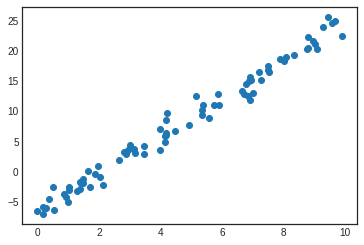

In [ ]:
# Generate simulated data
rng = np.random.RandomState(1)

x = 10 * rng.rand(80)

y = 3 * x - 6 + rng.randn(80)- rng.randn(80)

plt.scatter(x, y);

Obviously the above data is linear.  We could assume the nature of the data distribution is really a straight line, and the reason that some data does not fall on the line is due to noise.
<br><br>Time to create our model.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Follow our previous template to "learn" from our data.  Well, in this linear case, we are actually trying to pick/fit a straight line to our data.  That's exactly where the name of method, **fit**(), coming from.

In [ ]:
model.fit(x[:, None], y)

# print intercept and coefficients
print("Linear Regression Model coefficient=%.1f" %model.coef_[0])
print("Linear Regression Model intercept=%.1f" %model.intercept_)

Linear Regression Model coefficient=3.1
Linear Regression Model intercept=-6.6


Well, linear regression model is smart enough to find the exact line: 3x-6!!
<br><br>
Actually it finds a line that's very close to the generating line:

In [ ]:
# print intercept and coefficients
print("Linear Regression Model coefficient=%.2f" %model.coef_[0])
print("Linear Regression Model intercept=%.2f" %model.intercept_)

Linear Regression Model coefficient=3.11
Linear Regression Model intercept=-6.59


As always, <font color='blue'>Seeing is Believing</font>.  Let's visualize it!

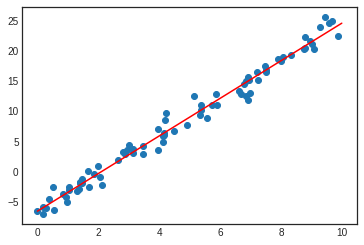

In [ ]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, None])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='r');

Why this <font color='red'>red</font> line? Why not another line that tilted slightly left?  Why not tilted slightly right?

### <font color='green'>Estimating ("Learning") Model Coefficients</font>

Coefficients and intercepts are estimated using **the least squares criterion**, which finds the line which minimizes the **sum of squared regression residuals** (also called, "**sum of squared regression errors(SSR)**"):

<table><tr>
<td> <img src="https://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/GUID-8278E3D7-7E53-4DEF-B0B8-8BE33F969BEA-web.png" style="width: 250px;"/> </td>
<td> <img src="https://i0.wp.com/www.fairlynerdy.com/wp-content/uploads/2017/01/r_squared_7.png?resize=625%2C280" style="width: 250px;"/> </td>
</tr></table>



### A Taste of Statistics

Linear Regression is actually a powerful and common tool in Statistics.
<br>
**The coefficient of determination (${R}^2$)** summarizes the explanatory power of the regression model and is computed from the sums-of-squares terms.
<br>
<img src="https://www.saedsayad.com/images/MLR_r2.png"/>

${R}^2$ describes the proportion of variance of the dependent variable explained by the regression model.  
<br><br>**We would like our model have a bigger ${R}^2$ value, because it would mean our model explain the variance well.**
<br><br>If the regression model is “**perfect**”, SSR is the same as SST, and **${R}^2$ is 1**. 
<br><br>If the regression model is **a total failure**, SSE is equal to SST, no variance is explained by regression, and **${R}^2$ is 0**.


### <font color='green'>Calculate ${R}^2$ value (fit of model)</font>

Luckily, ${R}^2$ is already calculated by machine learning library.  We only need to feed the real dependent variable values and the predicted values to it.
<br><br>As you see below, we have a very big ${R}^2$ value, almost equals 1.  It shows our model is a good fit for the simulated data!

In [ ]:
model.score(x[:, None], y)

0.9823737499529006

## <font color='green'>KNN Regression</font>

Actually, KNN model is not just for Classification.  It could be used for Regression too.
<br><br>
The only thing different is:

*   for KNN Classification model, the predicted value is the class membership decided by the majority vote by its K nearest neighbors;
*  for KNN Regression model, the predicted value is the average of the dependent variables of its K nearest neighbors.



In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(x[:,None], y) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Let's visualize again:

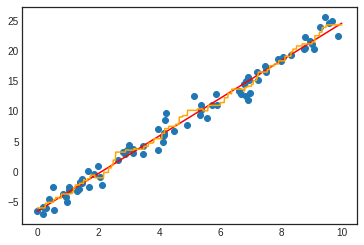

In [ ]:
xKnnFit = np.linspace(0, 10, 1000)
yKnnFit = knn.predict(xKnnFit[:, None])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='r');
plt.plot(xKnnFit, yKnnFit, color='orange');


How about the fit of the model?

In [ ]:
print("R Squared of LinearRegression Model = " + str( model.score(x[:, None], y)))
print("R Squared of KNNRegressor     Model = " + str( knn.score(x[:, None], y)))

R Squared of LinearRegression Model = 0.9823737499529006
R Squared of KNNRegressor     Model = 0.9863808221683533


## <font color='green'>Which Model is better?</font>

KNN Regression model has a better fit on training data.  But the training fit might hurt when the model is applied to test data (we didn't generate test data here), because that if the nature of the data is really linear, then KNN model might be more misled by the noise in the training data.  It is also called **overfit** training data.
<br>
![alt text](https://cdn-images-1.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png)
<br><br>What we prefer is a good fit to the real world data (or test data), where KNN Regression model might not be better.

# <font color='green'>How do Machine Learning Models <u>*Learn*</u> Training Data?</font>

We explained how KNN model fit data.  That is a special case.  How does general Machine Learning Model fit traing data?

##<font color='green'>Cost Function</font>

As discussed in Linear Regression, Machine Learning Algorithm needs a criteria to judge how good is the fit, and use it to adjust model parameters to figure out the best model (parameters).  This criteria is also called **Cost Function**, and the goal is to find the minimum of the Cost Function.
<br><br>
In terms of Linear Regression, the **Cost Function** is the **sum of squared regression
error (SSRE)**.  The goal is to find the model parameters (linear coefficient and intercept) that results in the **least** SSRE.
<br>
<img src="https://engmrk.com/wp-content/uploads/2018/05/cost-function-with-one-optima.jpg" style="width: 250px;"/>


## <font color='green'>Searching for the Minimum Value of Cost Function</font>

ML Algorithm will start from a random point, ${x_0}$, calculate the value of Cost Function at that point, J(${x_0}$).  
<br>Then it will check whether J(${x_0}$) is the minimum in ${x_0}$'s neighborhood.  If not, it will move to another point, ${x_1}$=${x_0}$+${delta_0}$, where J(${x_1}$) < J(${x_0}$).
<br><br>Then the progress continues.  If J(${x_1}$) is not the minimum in ${x_1}$'s neighborhood, it will move to another point, ${x_2}$=${x_1}$+${delta_1}$, where J(${x_2}$) < J(${x_1}$).
<br><br>If ML Algorithm reachs a point ${x_k}$, where J(${xk0}$) is the minimum in ${x_k}$'s neighborhood.  Then it finds the best **fit**.  It will stop and use the model parameters at this point  as the best (fit) model.
<br><br>
![alt text](https://cdn-images-1.medium.com/max/1600/1*UUHvSixG7rX2EfNFTtqBDA.gif)


## <font color='green'>Gradient Descent</font>

The Algorithm of searching for minimum of Cost Function is called **Gradient Descent**.  It is an optimization technique to find local optimum.
<br><br>***Optional*** The word, "Gradient", is related to Calculus.  If/when you learn Calculus, you will learn that derivative is the best way to find local minimum or local maximum.  Gradient is a multi-variable generalization of the derivative.
<br><br>
**Ignore** the derivative signs below if you have yet to learn Calculus.  We will explain Backpropagation when we discuss Neural Network Models.
<br><br>
![alt text](https://image.slidesharecdn.com/seminar-160314065246/95/intro-to-deep-learning-autoencoders-15-638.jpg?cb=1457940886)

##<font color='green'>Learning Rate</font>

### <font color='green'>Gradient Descent Step Size</font>

Depending on the shape of the Cost Function, it might take only a few iterations, or it might take many many iterations.
<br><br>
The detals above (${delta_0}, ${delta_1}, ...) are related to learning rate.  It is also called Gradient Descent **step**.  

### Potential Issues

The bigger the step size, the faster the learning rate.  The smaller the step size, the slower the learning rate.
<br><br>If step size is too large, learning might miss local minimum value and, even, fail to converge.
<br><br>If step size is too small, learning might take a long long time, especially for large data size.  Another issue is that learning might be trapped in local minimum and might miss global minimum.
<br><br>
![alt text](https://pbs.twimg.com/media/DK26ibcXUAEOwel.jpg)

# <font color='gold'>Ames, Iowa House Price Prediction</font>

We'll explore the Ames, Iowa Housing Dataset, prepared by Dean De Cock, and described in the paper Ames, Iowa: [Alternative to the Boston Housing Data as an End of Semester Regression Project.](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf)
<br><br>
This data set describing the sale of individual residential property in Ames, Iowa
from 2006 to 2010. The data set contains 79 explanatory
variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous), describing (almost) every aspect of residential homes in Ames, Iowa with the goal of predicting the selling price of each home.. 
<br><br>
[Ames, Iowa](https://en.wikipedia.org/wiki/Ames,_Iowa) is best known as the home of Iowa State University.  In 2010, Ames was ranked ninth on CNNMoney "Best Places to Live" list.
<br>
<table><tr>
<td> <img src="http://pix.epodunk.com/locatorMaps/ia/IA_7134.gif"/> </td>
<td> <img src="https://www.kiplinger.com/kipimages/Iowa-State-University-of-Science-and-TechnologyEDITED.jpg"/> </td>
</tr></table>

##<font color='green'>Data Description</font>

###<font color='green'>Feature Description</font>


* SalePrice — the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass — The building class
* MSZoning — The general zoning classification
* LotFrontage — Linear feet of street connected to property
* LotArea — Lot size in square feet
* Street — Type of road access
* Alley — Type of alley access
* LotShape — General shape of property
* LandContour — Flatness of the property
* Utilities — Type of utilities available
* LotConfig — Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

### <font color='green'>Feature Value Description</font>

Due to the vast number of features and possible values, please see full value description via this [link](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt). Below is a sample:
<br><br>

Exterior 1 (Nominal):  Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	  Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	  Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	  Stone
       Stucco	  Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Bsmt Qual (Ordinal): Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
Garage Type (Nominal): Garage location
		
       2Types	  More than one type of garage
       Attchd	  Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	  Detached from home
       NA	      No Garage
		



## <font color='green'>Upload data file to Google Colab Notebook</font>

In [ ]:
'''
from google.colab import files

uploaded = files.upload()
'''

'\nfrom google.colab import files\n\nuploaded = files.upload()\n'

If you need, you could download files from Google Colab Research computer too:

In [ ]:
'''
from google.colab import files

with open('for_download_test.txt', 'w') as f:
  f.write('Hello, Big Data Club')

files.download('for_download_test.txt')
'''

"\nfrom google.colab import files\n\nwith open('for_download_test.txt', 'w') as f:\n  f.write('Hello, Big Data Club')\n\nfiles.download('for_download_test.txt')\n"

## <font color='green'>Load Data into Pandas</font>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')
plt.style.context('seaborn-white')

import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('train.csv')

FileNotFoundError: ignored

In [ ]:
print ("Train data shape:", train.shape)

In [ ]:
train.head()

## <font color='green'>Exploratory Data Analysis (EDA)</font>

In [ ]:
# How expensive are houses?
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    train.SalePrice.min(), train.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    train.SalePrice.mean(), train.SalePrice.median()))
train.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

In [ ]:
# When were the houses built?
print('Oldest house built in {}. Newest house built in {}.'.format(
    train.YearBuilt.min(), train.YearBuilt.max()))
train.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()

Little building action in the 80s apparently. Majority of houses were built in the 50s and after.

In [ ]:
# When where houses sold?
train.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title('When where houses sold?')
plt.show()

It's easy to see an interesting strong seasonal pattern in house sales, with peaks in June and July.
<br><br>
The exception would be the July of 2010.  One posibility could be not all data was reported timely, hence couldn't be included in the dataset.

In [ ]:
# Where are houses?
train.groupby('Neighborhood').Id.count().\
    sort_values().\
    plot(kind='barh', figsize=(6,6))
plt.title('What neighborhoods are houses in?')
plt.show()

In [ ]:
# How big are houses
print('The average house has {:,.0f} sq ft of space, the median {:,.0f} sq ft'.format(
    train.GrLivArea.mean(), train.GrLivArea.median()))
print('The biggest house has {:,.0f} sq ft of space, the smallest {:,.0f} sq ft'.format(
    train.GrLivArea.max(), train.GrLivArea.min()))
train.GrLivArea.hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('How big are houses? (in sq feet)')
plt.show()

### Numerial Features

In [ ]:
# Let's start with our dependent variable, SalePrice
plt.figure(figsize=(10,6))
sns.distplot(train.SalePrice)
plt.show()

In [ ]:
def get_feature_groups():
    """ Returns a list of numerical and categorical features,
    excluding SalePrice and Id. """
    # Numerical Features
    num_features = train.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['Id','SalePrice']) # drop ID and SalePrice

    # Categorical Features
    cat_features = train.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = get_feature_groups()

In [ ]:
# Grid of distribution plots of all numerical features
f = pd.melt(train, value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

### Categorical Features

In [ ]:
# Count plots of categorical features
f = pd.melt(train, value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

### Relationship

In [ ]:
# Feature sorted by correlation to SalePrice, from positive to negative
corr = train[['SalePrice'] + num_features].corr()
corr = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')
plt.show()

In [ ]:
# Count plots of categorical features
f = pd.melt(train, id_vars=['SalePrice'], value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

##<font color='green'>Feature Engineering</font>

**One-hot encoding** is a common technique which will transform categorical data into numbers so the model can understand whether or not a particular observation falls into one category or another.

In [ ]:
print (train.Street.value_counts())

In the Street column, the unique values are Pave and Grvl, which describe the type of road access to the property. 
<br>In the training set, only 6 homes have gravel access. 
<br>Our model needs numerical data, so we will use one-hot encoding to transform the data into a Boolean column.  This encoded column needs to be added to both training set and test set.

In [ ]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

So we engineered a new feature, 'enc_street'.

In [ ]:
print (train.enc_street.value_counts())

## <font color='green'>Data Preprocessing</font>

Which columns have missing data?

In [ ]:
train.columns[train.isnull().sum() != 0].values

One way to deal with missing data is interpolation, which fills the missing values with an average value.

In [ ]:
data = train.select_dtypes(include=[np.number]).interpolate()

Verify there is no more column with empty data.

In [ ]:
len(data.columns[data.isnull().sum() != 0])

##<font color='green'>Build Linear Regression Model</font>

Set dependent variable. 

In [ ]:
y = train.SalePrice
X = data.drop(['SalePrice', 'Id'], axis=1)

Split data into training set and test set.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

Build model.  Lots of model parameters this time.

In [ ]:
from sklearn import linear_model

lr = linear_model.LinearRegression()

model = lr.fit(X_train, y_train)

print(model.coef_)

[-2.15564458e+02 -1.52490357e+02  5.17523974e-01  1.83554517e+04
  2.80344707e+03  2.50852836e+02  2.15588040e+02  2.62701612e+01
  6.89818089e+00 -2.52989755e+00 -2.16121017e+00  2.20707317e+00
  4.65199485e+00  6.48101693e-01  2.80521927e+01  3.33522892e+01
  1.19784282e+04 -5.61747151e+02  5.17960401e+03  9.09941791e+01
 -9.40466534e+03 -9.84908509e+03  6.89446338e+03  5.21576869e+03
  7.24033912e+01  1.26148524e+04  1.66205570e+00  2.63515502e+01
 -1.13062912e+01  1.44631601e+01  5.02479367e+01  9.11323968e+01
 -1.47082936e+02 -1.41736972e+00 -5.65014999e+01 -1.79015925e+02
  2.18924805e+04]


In [ ]:
print(model.intercept_)

-771601.9615223046


### <font color='green'>Goodness of Fit</font>

In [ ]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.7841741429178499


Another way to measure the fit is **root mean squared error (RMSE)**.
<br>
![alt text](https://www.includehelp.com/ml-ai/Images/rmse-1.jpg)


In [ ]:
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 1584462082.5754201


All in one cell:

In [ ]:
y = train.SalePrice

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)
model = lr.fit(X_train, y_train)
print ("R^2 is: \n", model.score(X_test, y_test))


predictions = model.predict(X_test)
print ('RMSE is: \n', mean_squared_error(y_test, predictions))


print ("\n\nTraing-set R^2 is: \n", model.score(X_train, y_train))

predictions = model.predict(X_train)
print ('Traing-set RMSE is: \n', mean_squared_error(y_train, predictions))



R^2 is: 
 0.7841741429178499
RMSE is: 
 1584462082.5754201


Traing-set R^2 is: 
 0.8122130202205164
Traing-set RMSE is: 
 1088571906.7527828


##<font color='green'>Enhancing Model by Log-Transform</font>

When performing regression, sometimes it makes sense to log-transform the target variable when it is skewed. One reason for this is to improve the linearity of the data. 
<br><br>
Recall that the SalePrice distribution in EDA is skewed, leaning to the left.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


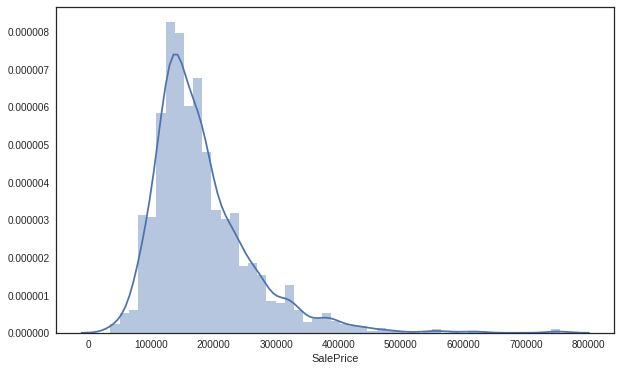

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(train.SalePrice)
plt.show()

By log-transform, the distribution is more even/linear.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


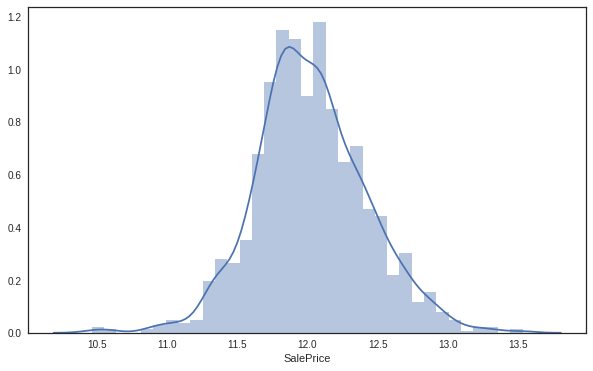

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(np.log(train.SalePrice))
plt.show()

Now re-run the model after log-transform.  We get a **better fit.**

In [ ]:
y = np.log(train.SalePrice)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)
model = lr.fit(X_train, y_train)
print ("R^2 is: \n", model.score(X_test, y_test))


predictions = model.predict(X_test)
print ('RMSE is: \n', mean_squared_error(y_test, predictions))



print ("\n\nTraing-set R^2 is: \n", model.score(X_train, y_train))

predictions = model.predict(X_train)
print ('Traing-set RMSE is: \n', mean_squared_error(y_train, predictions))


R^2 is: 
 0.8640176881832574
RMSE is: 
 0.02317565350928139


Traing-set R^2 is: 
 0.8638419633882806
Traing-set RMSE is: 
 0.02096624494977611


##<font color='green'>Build KNN Regression Model</font>

In [ ]:
y = train.SalePrice

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)

knnModel = knn.fit(X_train, y_train)
print ("R^2 is: \n", knnModel.score(X_test, y_test))
knnPredictions = knnModel.predict(X_test)
print ('RMSE is: \n', mean_squared_error(y_test, knnPredictions))



print ("\n\nTraing-set R^2 is: \n", knnModel.score(X_train, y_train))

knnPredictions = knnModel.predict(X_train)
print ('Traing-set RMSE is: \n', mean_squared_error(y_train, knnPredictions))


R^2 is: 
 0.6619307480031758
RMSE is: 
 2481898685.8915358


Traing-set R^2 is: 
 0.7472412287141104
Traing-set RMSE is: 
 1465203274.1049078


${R}^2$ is smaller, and RMSE is bigger.  Both indicate worse performance than Linear Regression Model.


### <font color='green'>Log-transform has small improvement on KNN Regression too.</font>

In [ ]:
y = np.log(train.SalePrice)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)

knnModel = knn.fit(X_train, y_train)
print ("R^2 is: \n", knnModel.score(X_test, y_test))
knnPredictions = knnModel.predict(X_test)
print ('RMSE is: \n', mean_squared_error(y_test, knnPredictions))


print ("\n\nTraing-set R^2 is: \n", knnModel.score(X_train, y_train))

knnPredictions = knnModel.predict(X_train)
print ('Traing-set RMSE is: \n', mean_squared_error(y_train, knnPredictions))


R^2 is: 
 0.6997122824172163
RMSE is: 
 0.05117845110009874


Traing-set R^2 is: 
 0.7707345860044488
Traing-set RMSE is: 
 0.03530335004793115


Again, ${R}^2$ is smaller, and RMSE is bigger.  Both indicate worse performance than Linear Regression Model.

### Based on ${R}^2$ difference between test set and training set, Linear Regression Model appears more fit on training set than KNN Regression Model.  Especially after log-transform.